In [1]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits

from setup import *
from FullFrame import FullFrame

from scipy.interpolate import interp1d

##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

##################
###   WASP4b   ###
##################
obs_date='ut20150819'                           #observation date
obj_name='Wasp4'                                #object name   
midtime=['2015-08-19T07:43:00.00']                 #time of midtransit, WAsp-4b

path='/Volumes/ermay_ext/Magellan/'+obs_date+'/'
data_path=path+obj_name+'_Spec/'      #path to where your data is saved
flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH=path+'SaveData_'+obj_name+'/'

wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn



from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)

import os

2048 4096


In [2]:
# HUitson 2017 --- W4

waves_dn_b=10.*np.array([440.2,450.7,460.2,469.1,487.0,496.0,504.9,515.2,524.8,534.8,564.8,574.8,585.3,594.9,612.8,621.7])
waves_up_b=10.*np.array([450.6,460.5,468.9,477.9,495.8,504.7,515.1,524.1,534.6,544.6,574.7,585.2,595.3,603.6,621.5,630.5])
rads_b=np.array([0.001,0.0005,-0.0001,0.0,0.0003,0.0002,0.0005,-0.0004,0.0001,0.0004,0.0012,0.0004,0.0009,0.0004,0.0005,0.0004])
rads_err_b=np.array([0.0008,0.0006,0.0008,0.0006,0.0011,0.0006,0.0005,0.0004,0.0008,0.0004,0.0006,0.0005,0.0004,0.0003,0.0004,0.0004])

waves_dn_r=10.*np.array([573.6,583.6,594.3,605.4,616.5,627.6,638.7,660.1,670.2,679.9,690.3,722.1,801.7,823.5,845.2,867.0,888.7,910.4])
waves_up_r=10.*np.array([583.2,593.3,605.1,616.1,627.2,638.3,648.7,669.5,679.5,689.9,700.3,746.4,824.9,846.6,868.4,890.1,911.9,934.6])
rads_r=np.array([0.0006,0.0013,0.0007,0.0005,0.0002,0.0003,0.0001,0.0003,0.0001,0.0003,0.0012,0.0001,0.0004,-0.0013,0.0002,-0.0005,0.0001,0.0007])
rads_err_r=np.array([0.0003,0.0004,0.0004,0.0003,0.0002,0.0002,0.0003,0.0004,0.0004,0.0004,0.0003,0.0012,0.0009,0.0012,0.0009,0.0006,0.0009,0.0006])

In [57]:
width=200

bin_counts=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_counts']  #[n_obj,n_exp,numbins]
bin_err=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_err']  #[n_obj,n_exp,numbins]

print bin_err.shape
bin_err=np.nanmedian(bin_err,axis=1)

# print 1./bin_err[0,:]
# print 1./bin_err[0,:]*10**6.

print 10**6./np.sqrt(np.nanmedian(bin_counts[0,:,:],axis=0))
print (10**6.)*bin_err[0,:]/np.nanmedian(bin_counts[0,:,:],axis=0)

extr=(10**6.)*bin_err[0,:]/np.nanmedian(bin_counts[0,:,:],axis=0)

(13, 112, 18)
[5296.01325222 4696.53254445 4386.60293326 4051.2989309  3878.86046192
 3767.12083264 3676.80460455 3644.80337872 3620.24697094 3601.36412889
 3574.09779865 3693.35403737 3761.17564233 3898.30548963 4079.87759953
 4468.43256826 4371.48660744 4648.33118008]
[394.52916128 352.25374804 331.18457729 307.76554794 296.37512867
 289.28992235 283.73260387 282.54916416 281.79959954 281.36072805
 280.22408418 290.44262678 296.56401404 308.13335312 323.25782747
 354.78627293 347.52224736 370.06769855]


# READ-IN DATA

In [108]:
###WASP 4b
width=100
#em=10.

bin_counts=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_counts']  #[n_exp,numbins,n_obj]
ptn_err=np.sqrt(bin_counts)
ppm_tar=1./ptn_err[:,:,0]
ppm_tar_exp=np.nanmedian(ppm_tar,axis=0)

bin_counts_200=np.load(SAVEPATH+'Binned_Data_200.npz')['bin_counts']  #[n_exp,numbins,n_obj]
ptn_err_200=np.sqrt(bin_counts_200)
ppm_tar_200=1./ptn_err_200[:,:,0]
ppm_tar_exp_200=np.nanmedian(ppm_tar_200,axis=0)


bin_ctr_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['bin_ctr']
rp_200=np.empty([len(bin_ctr_200)])
rp_e_200=np.empty([len(bin_ctr_200)])

bin_ctr=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
rp=np.empty([len(bin_ctr)])
rp_e=np.empty([len(bin_ctr)])

rpwhite=(np.load(SAVEPATH+'LightCurve_fits_white.npz')['params'])[2]

##################################################################################
norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr_200),vmax=np.max(bin_ctr_200))                                                                                                                 
colors=matplotlib.cm.Spectral_r
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
##################################################################################

yerr_binns=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['rmse']
yerr_binns_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['rmse']

print len(bin_ctr)

b=0
for b in range(0,len(bin_ctr)):
    filen='LightCurve_fits_'+str(int(bin_ctr[b]))+'.npz'
    rp[b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+filen)['params'][2])
    rp_e[b]=np.nanmedian((np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+filen)['paramserr'])[0,0])
    
for b in range(0,len(bin_ctr_200)):
    filen='LightCurve_fits_'+str(int(bin_ctr_200[b]))+'.npz'
    rp_200[b]=(np.load(SAVEPATH+'Fits_200/'+filen)['params'][2])
    rp_e_200[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+filen)['paramserr'])[0,0])
# for file in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
#     if file.endswith('.npz'):
#         if b==len(bin_ctr):
#             rpwhite=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['params'])[2]
#         else:
#             rp[b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['params'])[2]
#             rp_e[b]=np.nanmedian((np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['paramserr'])[0,0])
# #            rs_e[b]=np.abs(np.nanmedian(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['residuals']))*10**-6
#             b+=1
            
# b=0
# for file in os.listdir(SAVEPATH+'Fits_200/'):
#     if file.endswith('.npz'):
#         if b==len(bin_ctr_200):
#             rpwhite_200=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[2]
#         else:
#             rp_200[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[2]
#             rp_e_200[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[0,0])
# #            rs_e_200[b]=np.abs(np.nanmedian(np.load(SAVEPATH+'Fits_200/'+file)['residuals']))*10**-6
#             b+=1

35


In [109]:
print '----------------'
print '|   200 WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_200
print 'Rp/Rs: ', rp_200
print 'ERROR: ', rp_e_200
print 'e PPM: ', rp_e_200*10**6.

print '----------------'
print '|   '+str(int(width))+' WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr
print 'Rp/Rs: ', rp
print 'ERROR: ', rp_e
print 'e PPM: ', rp_e*10**6.


----------------
|   200 WIDTH   |
----------------
BINS:   [4700. 4900. 5100. 5300. 5500. 5700. 5900. 6100. 6300. 6500. 6700. 6900.
 7100. 7300. 7500. 7700. 7900. 8100.]
Rp/Rs:  [0.15599526 0.15903165 0.15295853 0.15712048 0.15294151 0.15341081
 0.15571795 0.15569755 0.15697537 0.15493455 0.15320245 0.15459787
 0.15592212 0.15568757 0.16144013 0.14689793 0.15530192 0.1574055 ]
ERROR:  [0.00143239 0.001355   0.00091516 0.00093994 0.00060984 0.00064078
 0.00070298 0.00052086 0.00055467 0.00064442 0.00088709 0.00153726
 0.00267293 0.00204197 0.00190814 0.0021498  0.00108804 0.00103657]
e PPM:  [1432.39450486 1354.99744718  915.15922743  939.94230275  609.83552335
  640.78233732  702.97881544  520.856514    554.67113679  644.42002715
  887.09161812 1537.25932019 2672.92764626 2041.96575447 1908.14388931
 2149.79605681 1088.0434409  1036.57413451]
----------------
|   100 WIDTH   |
----------------
BINS:   [4650. 4750. 4850. 4950. 5050. 5150. 5250. 5350. 5450. 5550. 5650. 5750.
 5850. 5950

In [110]:
### radius array include bins that do not have data - change to NAN results ##
###    (MCMC fitter saves the input value, correct to NAN here)                       ##

# first 2 bins in 200 width binning
# last bin in 200 width binning
#rm=[1,4,15,16]
rm=[]
for r in rm:
    rp_200[r]=np.nan
    rp_e_200[r]=np.nan


# if width==100:  #first 4 bins, last 2 bins
#     rp[0:4]=np.nan
#     rp_e[0:4]=np.nan
    
#     rp[-2:]=np.nan
#     rp_e[-2:]=np.nan
    
# if width==50:  #first 5 bins, last 4 bins
#     rp[0:5]=np.nan
#     rp_e[0:5]=np.nan
    
#     rp[-4:]=np.nan
#     rp_e[-4:]=np.nan

### SUBTRACT mwhite light value to match plots from Huitson
print rpwhite    #CHECK THAT THEY'RE THE SAME!

rp_200-=rpwhite
rp-=rpwhite

0.15553415703158202


# Compared to Other Data PLOT

In [62]:
# PLOT COLORS #
ncolor=40
color_list = plt.cm.plasma(np.linspace(0., 1, ncolor))

color1=color_list[int(ncolor/3)]
color2=color_list[int(2.*ncolor/3)]

In [63]:
### Calculate X-direction Errors (wavelength space) ###
xerr=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr_200=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))

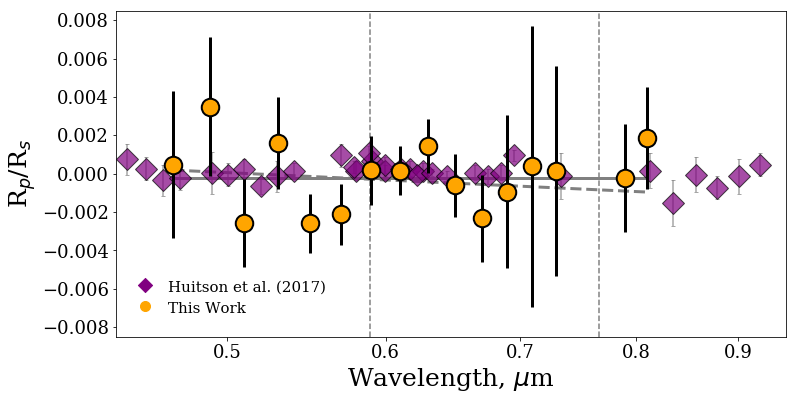

In [76]:
plt_wid=200

owave=np.logspace(4000,9000,1000)

wavelog=np.log(bin_ctr_200)
rays=np.polyfit(wavelog,rp_200,1)
ray=(np.poly1d(rays))(wavelog)

lins=np.polyfit(wavelog,rp_200,0)
lin=(np.poly1d(lins))(wavelog)



###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
Rs=6.4*10**10.
Tplan=1600.   #temperature of planet in K
gplan=1707.   # gravity in cm/s^2


slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)
raya=(np.poly1d([slope,0.1735]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp_200)**2.)
chi_flat=np.nansum((lin-rp_200)**2.)
chi_act=np.nansum((raya-rp_200)**2.)

xerr1=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr2=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))
                
            
            
plt.figure(figsize=(12,6)) 
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,5.25)) #half page size

plt.plot(wavelog,lin,color='grey',linewidth=3.0,linestyle='-')
plt.plot(wavelog,raya-rpwhite,color='grey',linewidth=3.0,linestyle='--')

plt.plot(np.log(waves_dn_b+(waves_up_b-waves_dn_b)/2.),rads_b+lin[0],'D',markersize=15,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
plt.errorbar(np.log(waves_dn_b+(waves_up_b-waves_dn_b)/2.),rads_b+lin[0],yerr=rads_err_b,zerr=(waves_up_b-waves_dn_b),capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

plt.plot(np.log(waves_dn_r+(waves_up_r-waves_dn_r)/2.),rads_r+lin[0],'D',markersize=15,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
plt.errorbar(np.log(waves_dn_r+(waves_up_r-waves_dn_r)/2.),rads_r+lin[0],yerr=rads_err_r,zerr=(waves_up_r-waves_dn_r),capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

#for b in range(0,len(bin_ctr)):
#    if b==0 or b==1 or b==3 or b==5:
#        continue
#    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=0.5,markersize=18,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),alpha=0.3,zorder=11)
#    #plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=ppm_tar_exp[b],xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)
#    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=ppm_tar_exp[b]+rp_e[b]+rs_e[b],xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)

    #em*(rp_e_200[b]+rs_e_200[b]+dt_e_t_200[b])
if plt_wid==200:
    for b in range(0,len(bin_ctr_200)):
        if b==14 or b==15:
            continue
    #if b==1:
    #    continue
        plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=35,markeredgecolor='black', markerfacecolor='orange',zorder=11)
        plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=rp_e_200[b]+yerr_binns_200[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=10)
else:
    for b in range(0,len(bin_ctr)):
        if plt_wid==100:
            if b==29 or b==30:
                continue
    #if b==1:
    #    continue
        plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=2.0,markersize=35,markeredgecolor='black', markerfacecolor='orange',zorder=11)
        plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=rp_e[b]+yerr_binns[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=10)
    
plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(9500))

#plt.ylim(0.157,0.167)
plt.ylim(-0.0085,0.0085)

plt.yticks(fontsize=18,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.13,0.82,'Flat Spectra, -', color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.13,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)

plt.scatter(np.log(4550),-0.0058,marker='D',s=100,c='purple')
plt.figtext(0.185,0.23, 'Huitson et al. (2017)',fontproperties=font,fontsize=15)

plt.scatter(np.log(4550),-0.0069,marker='o',s=100,c='orange')
plt.figtext(0.185,0.18, 'This Work',fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
#plt.show()
plt.savefig(SAVEPATH+'PLOTS/TSpec_Huitson'+str(int(width))+'.pdf')        

In [13]:
print chi_rayfit
print chi_flat/np.nanmedian(rp_e_200)
print chi_act/np.nanmedian(rp_e_200)

8.68330976409e-05
0.132835196263
2.62319635335


[4650. 4750. 4850. 4950. 5050. 5150. 5250. 5350. 5450. 5550. 5650. 5750.
 5850. 5950. 6050. 6150. 6250. 6350. 6450. 6550. 6650. 6750. 6850. 6950.
 7050. 7150. 7250. 7350. 7450. 7550. 7650. 7750. 7850. 7950. 8050.]
35


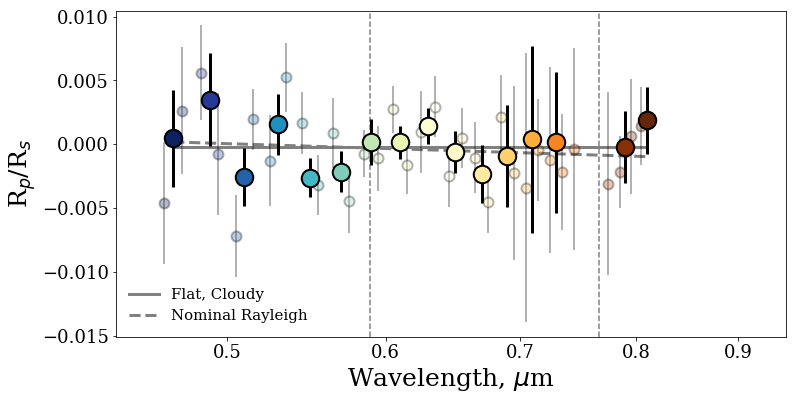

In [116]:
###WASP 4b
plt_wid=100
#em=10.

print bin_ctr

##################################################################################
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr),vmax=np.max(bin_ctr))                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
##################################################################################

print len(bin_ctr)

            
owave=np.logspace(4000,9000,1000)

wavelog=np.log(bin_ctr_200)
rays=np.polyfit(wavelog,rp_200,1)
ray=(np.poly1d(rays))(wavelog)

lins=np.polyfit(wavelog,rp_200,0)
lin=(np.poly1d(lins))(wavelog)



###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
Rs=6.4*10**10.
Tplan=1600.   #temperature of planet in K
gplan=1707.   # gravity in cm/s^2


slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)
raya=(np.poly1d([slope,0.1735]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp_200)**2.)
chi_flat=np.nansum((lin-rp_200)**2.)
chi_act=np.nansum((raya-rp_200)**2.)

xerr1=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr2=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))
                
            
            
plt.figure(figsize=(12,6)) 
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,5.25)) #half page size

plt.plot(wavelog,lin,color='grey',linewidth=3.0,linestyle='-',label='Flat, Cloudy')
plt.plot(wavelog,raya-rpwhite,color='grey',linewidth=3.0,linestyle='--', label='Nominal Rayleigh')

#plt.plot(np.log(waves_dn_b+(waves_up_b-waves_dn_b)/2.),rads_b+lin[0],'D',markersize=15,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
#plt.errorbar(np.log(waves_dn_b+(waves_up_b-waves_dn_b)/2.),rads_b+lin[0],yerr=rads_err_b,zerr=(waves_up_b-waves_dn_b),capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

#plt.plot(np.log(waves_dn_r+(waves_up_r-waves_dn_r)/2.),rads_r+lin[0],'D',markersize=15,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
#plt.errorbar(np.log(waves_dn_r+(waves_up_r-waves_dn_r)/2.),rads_r+lin[0],yerr=rads_err_r,zerr=(waves_up_r-waves_dn_r),capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)


for b in range(0,len(bin_ctr_200)):
    if b==14 or b==15:
        continue
#if b==1:
#    continue
    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=35,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr_200[b]),zorder=11)
    plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=rp_e_200[b]+yerr_binns_200[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=10)

for b in range(0,len(bin_ctr)):
    if plt_wid==100:
        if b==29 or b==30:
            continue
#if b==1:
#    continue
    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=2.0,markersize=20,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=10,alpha=0.3)
    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=rp_e[b]+yerr_binns[b],color='black',elinewidth=2.0,capsize=0.0,capthick=2.0,zorder=10,alpha=0.3)


plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(9500))

#plt.ylim(-0.0085,0.0085)

plt.legend(loc='lower left',fontsize=15,frameon=False)

plt.yticks(fontsize=18,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.14,0.82,'Flat Spectra, -', color='grey',fontsize=15,fontproperties=fontb)
# plt.figtext(0.14,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)


plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
#plt.show()
plt.savefig(SAVEPATH+'PLOTS/TSpec_alldata'+str(int(width))+'.pdf')        

In [104]:
width=200

import os
import matplotlib.colors as mcolors

raw_data_binns=np.load(SAVEPATH+'LC_bins_'+str(int(width))+'.npz')['data']

dat=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')
lc_data_binns=dat['data']
cw_noise=dat['cw']
rmse=dat['rmse']
polyfit=dat['polyfit']
bin_ctr=dat['bin_ctr']
n_bins=len(bin_ctr)

lc_data_white=np.load(SAVEPATH+'LCwhite_br.npz')['data']

bin_arr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bins']

t=np.load(SAVEPATH+'Obs_times.npz')['times']
n_exp=len(t)

###############
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr),vmax=np.max(bin_ctr))                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
################

lc_fit=np.empty([n_exp,n_bins])
lc_data=np.empty([n_exp,n_bins])

#b=0
lcwhite=(np.load(SAVEPATH+'LightCurve_fits_white.npz')['lightcurve_fit'])
t0=-1.0*(np.load(SAVEPATH+'LightCurve_fits_white.npz')['params'])[0]
for b in range(0,len(bin_ctr)):
    filen='LightCurve_fits_'+str(int(bin_ctr[b]))+'.npz'
    if filen in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
        lc_fit[:,b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+filen)['lightcurve_fit'])


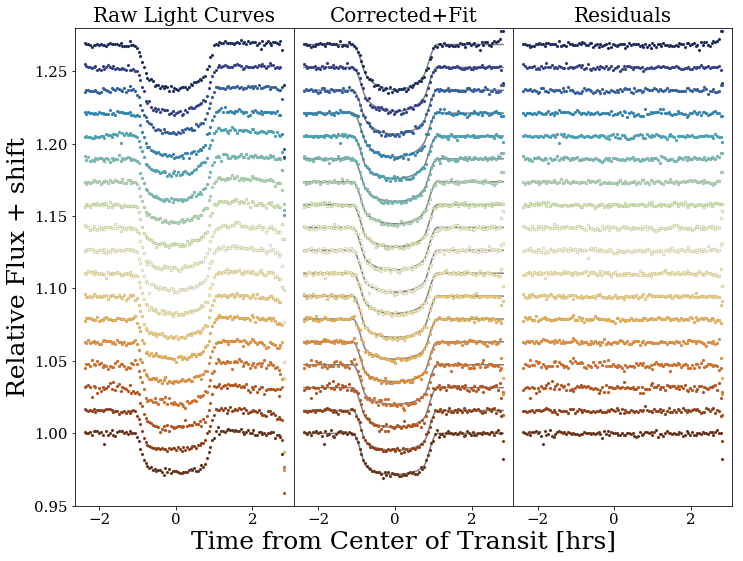

In [86]:
#plt.figure(figsize=(8.5,11))
#plt.figure(figsize=(10,7.5))
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,7.875))
#plt.figure(figsize=(8,5.25)) #half page size
#plt.figure(figsize=(8,3.5)) #third page size
fig,ax=plt.subplots(1,3,figsize=(10.5,8)) #full page rotated
fig.subplots_adjust(wspace=0, hspace=0)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.99)

shift=0
dv=45.

for b in range(n_bins-1,-1,-1):
    ax[0].plot(24*(t+t0),raw_data_binns[:,b]+shift,'.',markersize=6,markeredgecolor='grey',markeredgewidth=0.25,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[0].set_ylim(0.95,1.28)
ax[0].yaxis.set_tick_params(labelsize=15)
ax[0].xaxis.set_tick_params(labelsize=15)
ax[0].set_ylabel('Relative Flux + shift',fontsize=25)
#ax[0].set_xlabel('Time [hrs]',fontsize=25)
ax[0].set_title('Raw Light Curves',fontsize=20)

shift=0
for b in range(n_bins-1,-1,-1):
    ax[1].plot(24*(t+t0),lc_fit[:,b]+shift,'-',color='grey')
    ax[1].plot(24*(t+t0),(lc_data_binns[:,b])+shift,'.',markersize=6,markeredgecolor='grey',markeredgewidth=0.25,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    #ax[1].plot(24*(t+t0),(polyfit[:,b])+shift,'-',color='grey',alpha=0.7)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[1].set_ylim(0.95,1.28)
ax[1].set_yticks([])
ax[1].xaxis.set_tick_params(labelsize=15)
ax[1].set_xlabel('Time from Center of Transit [hrs]',fontsize=25)
ax[1].set_title('Corrected+Fit',fontsize=20)   

shift=0
for b in range(n_bins-1,-1,-1):
    ax[2].plot(24*(t+t0),(lc_data_binns[:,b]-lc_fit[:,b]+shift),'.',markersize=6,markeredgecolor='grey',markeredgewidth=0.25,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[2].set_ylim(0.95-1.0,1.28-1.0)
ax[2].set_yticks([])
ax[2].xaxis.set_tick_params(labelsize=15)
#ax[2].set_xlabel('Time [hrs]',fontsize=25)
ax[2].set_title('Residuals',fontsize=20)      

plt.show()

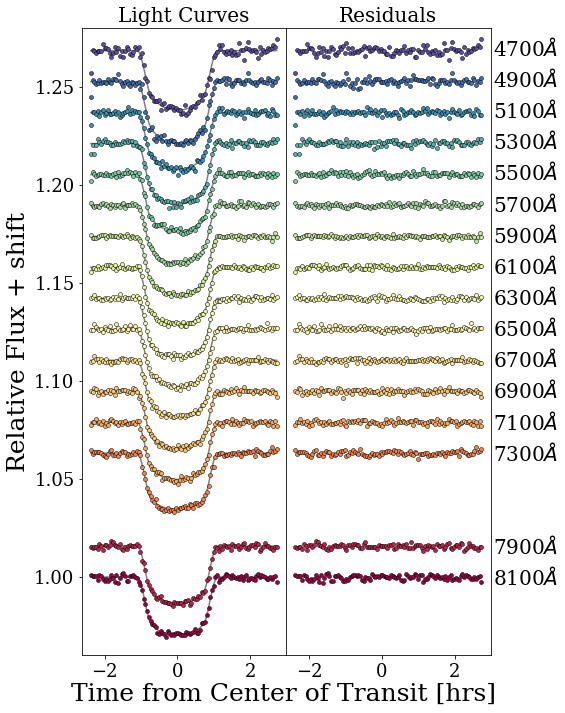

In [89]:
#plt.figure(figsize=(8.5,11))
#plt.figure(figsize=(10,7.5))
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,7.875))
#plt.figure(figsize=(8,5.25)) #half page size
#plt.figure(figsize=(8,3.5)) #third page size
fig,ax=plt.subplots(1,2,figsize=(8,10.5)) #full page rotated
fig.subplots_adjust(wspace=0, hspace=0)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.15,right=0.86)

shift=0
dv=45.

ymin=0.96
ymax=1.28

shift=0
for b in range(n_bins-1,-1,-1):
    if b==14 or b==15:
        shift+=0.75*(n_bins/dv)/(n_bins+1.)
        continue
    ax[0].plot(24*(t[:-2]+t0),lc_fit[:-2,b]+shift,'-',color='grey')
    ax[0].plot(24*(t[:-2]+t0),(lc_data_binns[:-2,b])+shift,'.',markersize=8,markeredgecolor='black',markeredgewidth=0.5,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    #ax[1].plot(24*(t+t0),(polyfit[:,b])+shift,'-',color='grey',alpha=0.7)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[0].set_ylim(ymin,ymax)
ax[0].yaxis.set_tick_params(labelsize=18)
ax[0].xaxis.set_tick_params(labelsize=18)
ax[0].set_ylabel('Relative Flux + shift',fontsize=25)
ax[0].set_title('Light Curves',fontsize=20)  

shift=0
for b in range(n_bins-1,-1,-1):
    if b==14 or b==15:
        shift+=0.75*(n_bins/dv)/(n_bins+1.)
        continue
    ax[1].plot(24*(t[:-2]+t0),(lc_data_binns[:-2,b]-lc_fit[:-2,b]+shift),'.',markersize=8,markeredgecolor='black',markeredgewidth=0.5,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[1].set_ylim(ymin-1.0,ymax-1.0)
ax[1].set_yticks([])
ax[1].xaxis.set_tick_params(labelsize=18)
#ax[1].set_xlabel('Time [hrs]',fontsize=25)
ax[1].set_title('Residuals',fontsize=20)  

plt.figtext(0.5,0.06,'Time from Center of Transit [hrs]',fontsize=25,ha='center')

shift=0
for b in range(n_bins-1,-1,-1):
    if b==14 or b==15:
        shift+=0.75*(n_bins/dv)/(n_bins+1.)
        continue
    plt.figtext(0.865,0.213+2.61*shift,str(int(bin_ctr[b]))+'$\AA$',color='black',fontsize=20)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)

plt.savefig(SAVEPATH+'PLOTS/all_lcs_err_'+str(int(width))+'_new.pdf')    
plt.show()

In [128]:
print rmse*10**6.
print np.nansum((lc_data_binns-lc_fit)**2.,axis=0)*10**6.

[2022.31177674 1643.34357561 1085.23078304  960.90284413 1095.99509375
 1198.00550188 1360.70719193  862.18917442 1833.41733358 1161.12628566
 1498.57697837 1207.83709648 5188.98451957 4797.13545395 2836.54204734
 3087.09712107 2843.85819449 2633.36546043]
[ 313.27683339  226.40329448  126.97814246  119.87634499  116.93751969
  127.64385006  147.79919706   84.6415601   260.46006173  149.90660663
  180.58622263  122.61628855 1765.4824236  1515.47384057  634.70686649
  724.8941309   560.44937482  502.13874494]


18
[ 4400.  4600.  4800.  5000.  5200.  5400.  5600.  5800.  6000.  6200.
  6400.  6600.  6800.  7000.  7200.  7400.  7600.  7800.  8000.  8200.
  8400.]


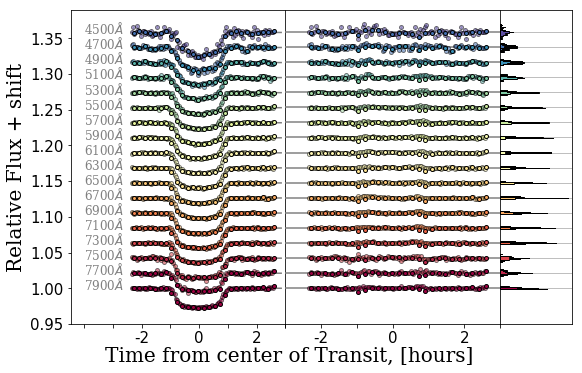

In [32]:
ymin=0.95
ymax=1.01

shift=np.linspace(0,n_bins/35., n_bins+1)
shift=0
dv=45.
p0=plt.subplot(gs1[:,:3])
for b in range(n_bins-1,-1,-1):
#    if b==0 or b==1 or b==2:
#        continue
    p0=plt.plot(24*(t+t0),lc_fit[:,b]+shift,'-',linewidth=1.5,color='grey',zorder=10)
    p0=plt.plot(24*(t+t0),lc_data_binns[:,b]+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=11,alpha=0.5)
    #p0=plt.annotate(str(int(bin_ctr[b]))+'$\AA$',xy=(-3.8,1.0+shift-0.002),ha='left',fontproperties=font,color='grey',fontsize=12)
    p0=plt.annotate(str(int(bin_ctr[b]))+'$\AA$',xy=(-4.0,1.0+shift-0.002),ha='left',fontproperties=font,color='grey',fontsize=12)

    p0=plt.plot(24*(t_z+t0),lc_data_binns_z[:,b]+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]+width),zorder=12)
    p0=plt.errorbar(24*(t+t0),lc_data_binns[:,b]+shift,yerr=ppm_tar_exp[b],ecolor=scal_m.to_rgba(bin_ctr[b]),elinewidth=0.5,alpha=0.7,fmt=None,zorder=11)
    shift+=(n_bins/dv)/(n_bins+1.)
p0=plt.xlim((t[0]-0.08)*24,(t[-1]+0.01)*24)
p0=plt.ylim(ymin,ymax+shift)
p0=plt.ylabel('Relative Flux + shift',fontsize=20,fontproperties=font)
p0=plt.yticks(fontsize=15)
#p0=plt.xticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4],['','','-4','', '-2','','0','','2','','4'],fontsize=15)
#p0=plt.xticks([-4,-3,-2,-1,0,1,2,3,4],['-4','', '-2','','0','','2','','4'],fontsize=15)
#p0=plt.xticks([-4,-3,-2,-1,0,1,2,3,4],['-4','','-2','','0','','2','','4'],fontsize=15)
p0=plt.xticks([-4,-3,-2,-1,0,1,2,3],['','','-2','','0','','2',''],fontsize=15)
    
residuals=lc_data_binns-lc_fit
residuals_z=lc_data_binns_z-lc_fit_z

shift=0
p1=plt.subplot(gs1[:,3:6])
for b in range(n_bins-1,-1,-1):
#    if b==0 or b==1 or b==2:
#        continue
    p1=plt.axhline(y=np.nanmean((residuals[:,b])+shift),color='grey',linewidth=1.5,zorder=10)
    p1=plt.plot(24*(t+t0),(residuals[:,b])+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=11,alpha=0.5)
    
    p1=plt.plot(24*(t_z+t0),(residuals_z[:,b])+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]+width),zorder=12)
    p1=plt.errorbar(24*(t+t0),(residuals[:,b])+shift,yerr=ppm_tar_exp[b],ecolor=scal_m.to_rgba(bin_ctr[b]),elinewidth=0.5,alpha=0.7,fmt=None,zorder=11)
    shift+=(n_bins/dv)/(n_bins+1.)
p1=plt.yticks([],[])
#p1=plt.xticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4],['','','-4','', '-2','','0','','2','','4'],fontsize=15)
#p1=plt.xticks([-3,-2,-1,0,1,2,3,4],['','-2','','0','','2','','4'],fontsize=15)
p1=plt.xticks([-3,-2,-1,0,1,2,3],['','-2','','0','','2',''],fontsize=15)

p1=plt.ylim(ymin-1.0,ymax-1.0+shift)

p2=plt.subplot(gs1[:,6])
shift=0
for b in range(n_bins-1,-1,-1):
#    if b==0 or b==1 or b==2:
#        continue
    finite=residuals[np.isfinite(residuals[:,b]),b]
    p2=plt.axhline(y=np.nanmean((residuals[:,b])+shift),color='grey',linewidth=0.5,zorder=10)
    p2=plt.hist((finite[:]+shift),bins=31,orientation='horizontal',histtype='stepfilled',edgecolor='black',facecolor=scal_m.to_rgba(bin_ctr[b]),normed=True,zorder=11)
    shift+=(n_bins/dv)/(n_bins+1.)
p2=plt.ylim(ymin-1.0,ymax-1.0+shift)
p2=plt.yticks([],[])
p2=plt.xticks([],[])
#plt.ylim(0.98,1.01+shift[-1])

#plt.figtext(0.12,0.14,'ut20160811',fontsize=15,fontproperties=fontb,color='black')

plt.figtext(0.5,0.02,'Time from center of Transit, [hours]', fontsize=20, ha='center',fontproperties=font)

plt.savefig(SAVEPATH+'PLOTS/all_lcs_err_'+str(int(width))+'_new.pdf')    

In [92]:
#5=c1 6=c2
bin_ctr_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['bin_ctr']

nbins=len(bin_ctr_200)


fit_c1=np.empty([nbins])*0.0
fit_c2=np.empty([nbins])*0.0

c1_err=np.empty([nbins])*0.0
c2_err=np.empty([nbins])*0.0

import os

b=0
for file in os.listdir(SAVEPATH+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200):
            print b, file
#            c1_white=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[5]
#            c2_white=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[6]
        else:
            fit_c1[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[5]
            fit_c2[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[6]
            c1_err[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[1])
            c2_err[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[2])
            b+=1
            
print fit_c1
print fit_c2

print c1_err
print c2_err

print bin_ctr_200

for b in range(0,len(bin_ctr_200)):
    if b==14 or b==15:
        fit_c1[b]=np.nan
        fit_c2[b]=np.nan
        c1_err[b]=np.nan
        c2_err[b]=np.nan

[0.61803115 0.59499703 0.57527864 0.56028859 0.51633059 0.52642979
 0.48403528 0.43712792 0.44199058 0.44035287 0.4415797  0.43029465
 0.40702558 0.37483549 0.44273251 0.30034085 0.40770065 0.37659856]
[0.07833297 0.11428543 0.14748795 0.19920776 0.21328411 0.24607703
 0.22539536 0.21211071 0.24587806 0.2508599  0.27659443 0.27772249
 0.27110235 0.24631306 0.32128718 0.19842305 0.31149254 0.29713753]
[0.03641481 0.0345556  0.02617699 0.02575266 0.01987527 0.02037794
 0.02145187 0.01851774 0.0182873  0.0204991  0.02578257 0.04082325
 0.06016905 0.05232667 0.03786249 0.04918329 0.03106217 0.02986869]
[0.035285   0.03615916 0.03026196 0.03011414 0.02537549 0.0258799
 0.026242   0.02469931 0.02357083 0.02521094 0.02986784 0.0424032
 0.05801456 0.0535308  0.0290241  0.04351671 0.0302501  0.03210919]
[4700. 4900. 5100. 5300. 5500. 5700. 5900. 6100. 6300. 6500. 6700. 6900.
 7100. 7300. 7500. 7700. 7900. 8100.]


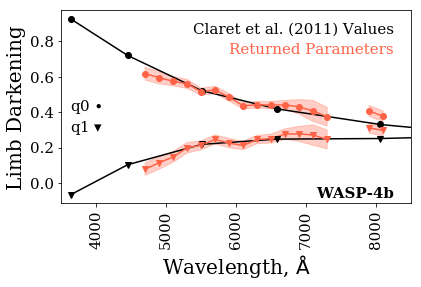

In [93]:
ft_c='tomato'

#_ac is CLARET TABLES
#_ft is FIT VALUES

c1_ft=fit_c1
c2_ft=fit_c2

c1_ac=np.array([0.9264,0.7208,0.5216,0.4191,0.3307,0.1767])  #WASP4
c2_ac=np.array([-0.0652,0.1033,0.2184,0.2481,0.2514,0.2922]) #WASP4
#c1_ac=np.array([1.0666,0.8661,0.6538,0.5240,0.4100,0.2315])
#c2_ac=np.array([-0.2171,-0.0193,0.1211,0.1803,0.2043,0.2752])
wave=[3640,4450,5510,6580,8060,12200]

bins=bin_ctr_200

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

plt.gcf().subplots_adjust(bottom=0.28,top=0.95,left=0.18,right=0.99)

plt.plot(wave,c1_ac,color='black')
plt.plot(bins,c1_ft,color=ft_c)
plt.plot(wave,c1_ac,'o',color='black')
plt.plot(bins,c1_ft,'o',color=ft_c)

plt.plot(wave,c2_ac,color='black')
plt.plot(bins,c2_ft,color=ft_c)
plt.plot(wave,c2_ac,'v',color='black')
plt.plot(bins,c2_ft,'v',color=ft_c)

plt.fill_between(bins,c1_ft-c1_err,c1_ft+c1_err,color=ft_c,alpha=0.3)
plt.fill_between(bins,c2_ft-c2_err,c2_ft+c2_err,color=ft_c,alpha=0.3)


plt.figtext(0.95,0.87,'Claret et al. (2011) Values',color='black',fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.95,0.80,'Returned Parameters',color=ft_c,fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.2,0.6,'q0 $\\bullet$',color='black',fontsize=15,fontproperties=font)
plt.figtext(0.2,0.53,'q1 $\\blacktriangledown$',color='black',fontsize=15,fontproperties=font)

plt.figtext(0.95,0.3,'WASP-4b',color='black',ha='right',fontsize=15,fontproperties=fontb)

plt.xticks(fontproperties=font,fontsize=15,rotation='vertical')
plt.yticks(fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\mathrm{\AA}$',fontproperties=font,fontsize=20)
plt.ylabel('Limb Darkening',fontproperties=font,fontsize=20)

plt.xlim(3500,8500)

plt.savefig(SAVEPATH+'PLOTS/Claret_vs_fit_limbdark.pdf')
plt.show()

2112 2274


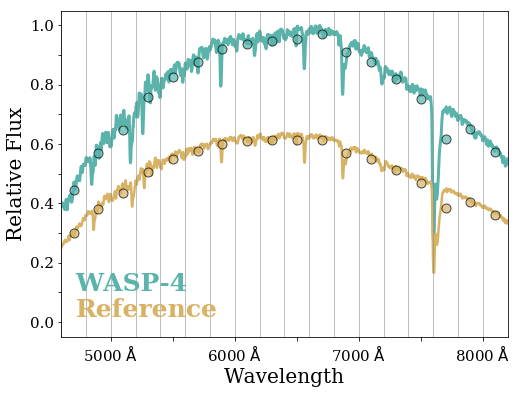

In [95]:
corr=False
width_bin=200

import scipy.signal

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')
cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['convolved']
#cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['data']
wav_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['wave']
#    tot_err=np.load(SAVEPATH+'FlattenedSpectra.npz')['tot_err']
binns=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_counts']
bin_a=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bins']
bin_c=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_centers']

cnt_arr=np.flip(cnt_arr,axis=2)
wav_arr=np.flip(wav_arr,axis=2)

#Wasp52
#-------
#Cals_ind=[2]
#Cals_ind=[2,3,5,8]  
#csn=2

#Wasp4
#------
#1,4,5,7,8,10,11,12
#USE: 5,
Cals_ind=[5]

#HatP26b
#-----
#1,2,3,4,5,6,7
# X 1
#------
#Cals_ind=[2,3,4,5,6]
#csn=2

#Cals=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_t=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_p=np.zeros_like(cnt_arr[0,0,:])
#for c in Cals_ind:
#    Cals=(np.nansum([Cals,cnt_arr[c,0,:]],axis=0))
#    errs_cw_t=np.sqrt(np.nansum([errs_cw_t,tot_err[c,0,:]**2.],axis=0))
#    errs_cw_p=np.sqrt(np.nansum([errs_cw_p,ptn_err[c,0,:]**2.],axis=0))

plt.figure(figsize=(8,6))

t=10
tar=scipy.signal.medfilt(cnt_arr[0,t,:]/np.nanmax(cnt_arr[0,t,:]),kernel_size=1)

#r1=1865
#r2=1878
#tar[r1:r2+1]=np.nan

tarc='#5ab4ac'
calc='#d8b365'

bot=np.argmin(np.abs(wav_arr[0,t,:]-6600))
top=np.argmin(np.abs(wav_arr[0,t,:]-6800))
print bot, top

# med_bin0=np.nanmean(cnt_arr[0,t,bot:top]/np.nanmax(cnt_arr[0,t,:]))
# med_binc=np.nanmean(cnt_arr[c,t,bot:top]/np.nanmax(cnt_arr[c,t,:]))
# print med_bin0, med_binc

#for t in range(0,wav_arr.shape[1]):
plt.plot(wav_arr[0,t,:],tar,linewidth=3.0,color=tarc)
#for p in range(0,len(wav_arr[0,t,:])):
#    plt.annotate(p,xy=(wav_arr[0,t,p],tar[p]))
for c in Cals_ind:
    plt.plot(wav_arr[c,t,:],cnt_arr[c,t,:]/np.nanmax(cnt_arr[0,t,:]),linewidth=2.5,color=calc)

#plt.axvline(x=7593.7,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6867.19,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6562.81,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5895.9,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5889.9,color='grey',linewidth=0.5,linestyle='--')

for b in range(0,len(bin_a)):
    plt.axvline(x=bin_a[b],color='grey',linewidth=0.5)


    
plt.plot(bin_c,0.97*binns[0,t,:]/np.nanmax(binns[0,t,:]),'.',markersize=18,markeredgecolor='black',markerfacecolor=tarc,alpha=0.7)
for c in Cals_ind:
    plt.plot(bin_c,0.97*binns[c,t,:]/np.nanmax(binns[0,t,:]),'.',markersize=18,markeredgecolor='black',markerfacecolor=calc,alpha=0.7)                       

plt.xticks([5000,5500,6000,6500,7000,7500,8000],['5000 $\mathrm{\AA}$','','6000 $\mathrm{\AA}$','','7000 $\mathrm{\AA}$','','8000 $\mathrm{\AA}$'],fontsize=15,fontproperties=font)
plt.xlabel('Wavelength',fontsize=20,fontproperties=font)

plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],['0.0','','0.2','','0.4','','0.6','','0.8','','1.0'],fontsize=15,fontproperties=font)
plt.ylabel('Relative Flux',fontsize=20,fontproperties=font)

plt.figtext(0.15,0.23,'WASP-4',fontsize=25,fontproperties=fontb,color=tarc)
plt.figtext(0.15,0.17,'Reference',fontsize=25,fontproperties=fontb,color=calc)

#plt.figtext(0.15,0.8,'ut20160922',fontsize=15,fontproperties=fontb,color='black')

plt.xlim(4600,8200)

plt.savefig(SAVEPATH+'PLOTS/Spectra_'+str(int(width_bin))+'.pdf')

In [154]:
print binns.shape
print cnt_arr.shape

(112, 18, 13)
(13, 112, 8249)


In [118]:
for b in range(0,len(bin_ctr_200)):
    print bin_ctr_200[b], np.round(rp_200[b]+rpwhite,4), np.round(rp_e_200[b],5)

print '********'
for b in range(0,len(bin_ctr_200)):
    print bin_ctr_200[b],np.round(fit_c1[b],3),np.round(c1_err[b],4),'     ', np.round(fit_c2[b],3), np.round(c2_err[b],4)

4700.0 0.156 0.00143
4900.0 0.159 0.00135
5100.0 0.153 0.00092
5300.0 0.1571 0.00094
5500.0 0.1529 0.00061
5700.0 0.1534 0.00064
5900.0 0.1557 0.0007
6100.0 0.1557 0.00052
6300.0 0.157 0.00055
6500.0 0.1549 0.00064
6700.0 0.1532 0.00089
6900.0 0.1546 0.00154
7100.0 0.1559 0.00267
7300.0 0.1557 0.00204
7500.0 0.1614 0.00191
7700.0 0.1469 0.00215
7900.0 0.1553 0.00109
8100.0 0.1574 0.00104
********
4700.0 0.618 0.0364       0.078 0.0353
4900.0 0.595 0.0346       0.114 0.0362
5100.0 0.575 0.0262       0.147 0.0303
5300.0 0.56 0.0258       0.199 0.0301
5500.0 0.516 0.0199       0.213 0.0254
5700.0 0.526 0.0204       0.246 0.0259
5900.0 0.484 0.0215       0.225 0.0262
6100.0 0.437 0.0185       0.212 0.0247
6300.0 0.442 0.0183       0.246 0.0236
6500.0 0.44 0.0205       0.251 0.0252
6700.0 0.442 0.0258       0.277 0.0299
6900.0 0.43 0.0408       0.278 0.0424
7100.0 0.407 0.0602       0.271 0.058
7300.0 0.375 0.0523       0.246 0.0535
7500.0 nan nan       nan nan
7700.0 nan nan       nan nan
